### A consolidated place to visualize value CCGP for both subjects, both timesteps

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.ccgp_value_configs import *
import scipy
import argparse
import copy

In [2]:
SAM_PAIRS_PATH = "/data/patrick_res/sessions/SA/pairs_at_least_3blocks_10sess_more_sess.pickle"
BL_PAIRS_PATH = "/data/patrick_res/sessions/BL/pairs_at_least_2blocks_6sess.pickle"

### Sam, Stim Onset, temporal drive

In [3]:
pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_ccgp_value(args, pairs)


In [4]:
res.condition.unique()

array(['within_cond', 'across_cond', 'overall', 'within_cond_shuffle',
       'across_cond_shuffle', 'overall_shuffle'], dtype=object)

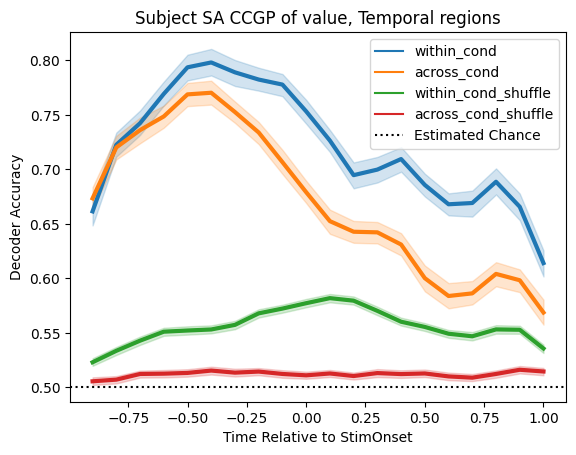

In [5]:
fig, ax = plt.subplots()
sub_res = res[res.condition.isin(("within_cond", "across_cond", "within_cond_shuffle", "across_cond_shuffle"))]
visualization_utils.visualize_ccpg_value(args, sub_res, ax)

### Sam, FeedbackOnset, temporal drive

In [6]:
pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Temporal"
args.trial_event = "FeedbackOnset"
res = io_utils.read_ccgp_value_combine_fb(args, pairs)

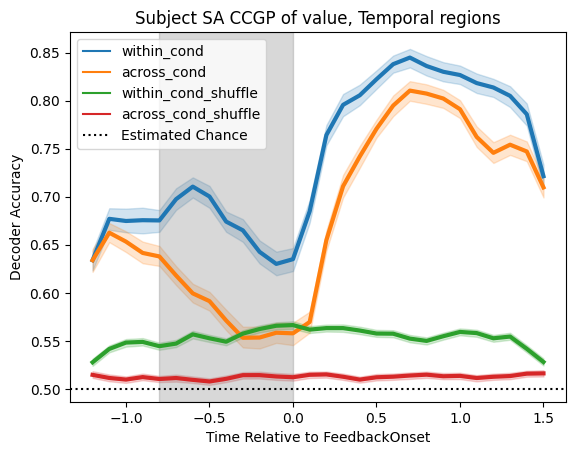

In [9]:
fig, ax = plt.subplots()
sub_res = res[res.condition.isin(("within_cond", "across_cond", "within_cond_shuffle", "across_cond_shuffle"))]
visualization_utils.visualize_ccpg_value(args, sub_res, ax)

### Sam Stim Onset anterior drive

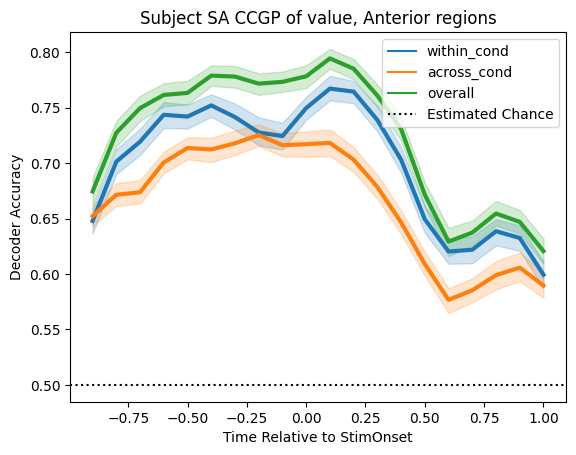

In [13]:
pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Anterior"
args.trial_event = "StimOnset"
res = io_utils.read_ccgp_value(args, pairs, num_shuffles=0)

fig, ax = plt.subplots()
visualization_utils.visualize_ccpg_value(args, res, ax)

### Sam, Feedback Onset Anterior

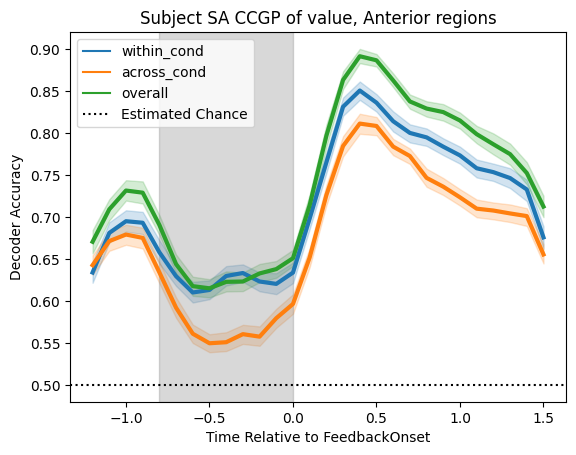

In [14]:
pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.region_level = "drive"
args.regions = "Anterior"
args.trial_event = "FeedbackOnset"
res = io_utils.read_ccgp_value_combine_fb(args, pairs, num_shuffles=0)

fig, ax = plt.subplots()
visualization_utils.visualize_ccpg_value(args, res, ax)

### Blanch, Stim Onset

In [21]:
pairs = pd.read_pickle(BL_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.subject = "BL"
res = io_utils.read_ccgp_value(args, pairs)
res = res[~res.condition.isin(["overall", "overall_shuffle"])]


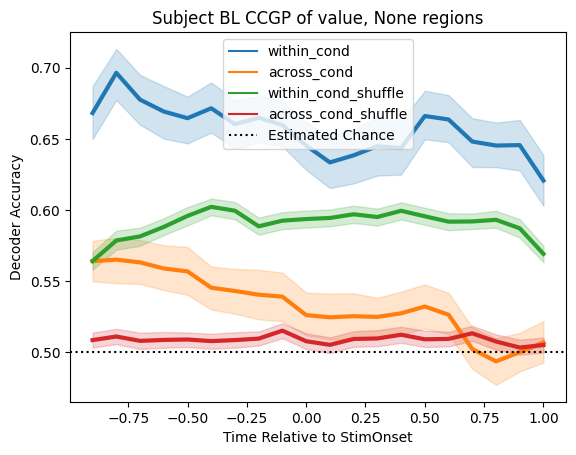

In [22]:
fig, ax = plt.subplots()
visualization_utils.visualize_ccpg_value(args, res, ax)

### Blanche, Feedback onset

In [17]:
pairs = pd.read_pickle(BL_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.subject = "BL"
args.trial_event = "FeedbackOnset"
res = io_utils.read_ccgp_value_combine_fb(args, pairs)

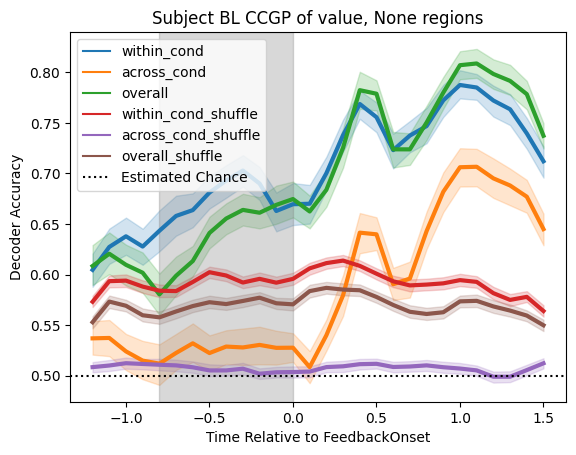

In [18]:
fig, ax = plt.subplots()
visualization_utils.visualize_ccpg_value(args, res, ax)

### Sam, Basal Ganglia

In [5]:
pairs = pd.read_pickle(SAM_PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **CCGPValueConfigs()._asdict()
)
args.region_level = "manual_structure_cleaned"
args.regions = "Basal_Ganglia"

bg_res = io_utils.read_ccgp_value(args, pairs)
bg_res = bg_res[bg_res.condition.isin(["within_cond", "across_cond"])]
bg_res.condition = bg_res.condition + " BG"

args.regions = "Hippocampus_MTL"
hc_res = io_utils.read_ccgp_value(args, pairs)
hc_res = hc_res[hc_res.condition.isin(["within_cond", "across_cond"])]
hc_res.condition = hc_res.condition + " HC/MTL"

res = pd.concat((bg_res, hc_res))

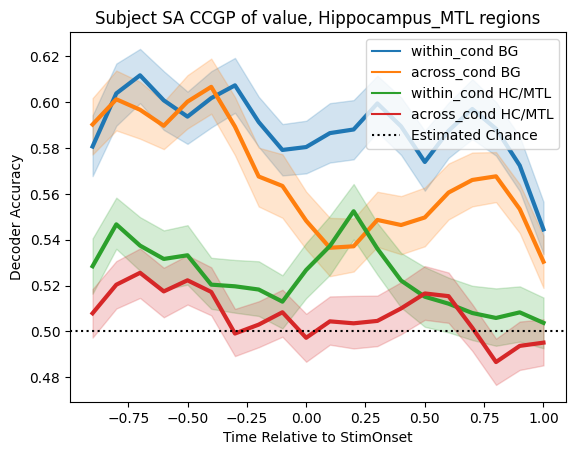

In [6]:
fig, ax = plt.subplots()
visualization_utils.visualize_ccpg_value(args, res, ax)